In [2]:
import os, sys, random
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def sample_image(path):
    files = [f for f in os.listdir(path)]
    chosen_file = random.choice(files)
    image = cv2.imread(os.path.join(path, chosen_file), cv2.IMREAD_UNCHANGED) 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (640, 480))
    return image

/Users/carlosalbertocalgarofilho/Workspace/tcc/6d-pose-estimation/data/images/cat/images
/Users/carlosalbertocalgarofilho/Workspace/tcc/6d-pose-estimation/data/images/cat/labels
(480, 640, 3)
[['0.508593', ' 0.455434', ' 0.588622', ' 0.512249', ' 0.566407', ' 0.415597', ' 0.455244', ' 0.549091', ' 0.415986', ' 0.459653', ' 0.578390', ' 0.433569', ' 0.555906', ' 0.331346', ' 0.450681', ' 0.470530', ' 0.412659', ' 0.375331']]


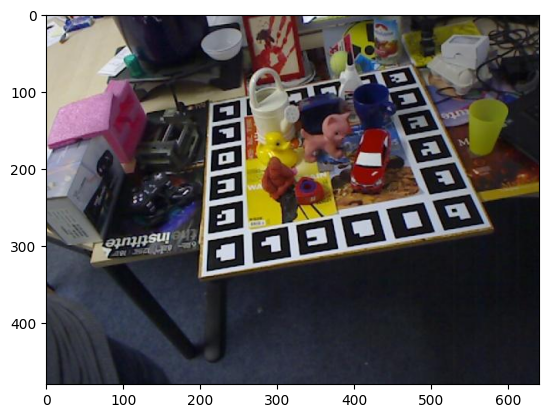

In [9]:
import csv
base_path = os.path.join(os.path.abspath(''), "data", "images", "cat")
images_path = os.path.join(base_path, 'images')
labels_path = os.path.join(base_path, 'labels')
keypoints = []
with open(os.path.join(labels_path, '000001.csv'), newline='') as csvfile:
  reader = csv.reader(csvfile)
  for row in reader:
    keypoints.append(row)
print(str(images_path))
print(str(labels_path))

image = sample_image(images_path)
image = np.array(image)
plt.imshow(image)
print(image.shape)
print(keypoints)

In [10]:
from lib.tccnet import TccNetBuilder

model = TccNetBuilder().build_model()

IT LIVES!
Shapes:  (None, 240, 320, 64)   (None, 240, 320, 64)
Shapes:  (None, 240, 320, 64)   (None, 240, 320, 64)
Reshaping skip from:  (None, 240, 320, 64)  to:  (None, 120, 160, 128)
Shapes:  (None, 120, 160, 128)   (None, 120, 160, 128)
Shapes:  (None, 120, 160, 128)   (None, 120, 160, 128)
Reshaping skip from:  (None, 120, 160, 128)  to:  (None, 60, 80, 256)
Shapes:  (None, 60, 80, 256)   (None, 60, 80, 256)
Shapes:  (None, 60, 80, 256)   (None, 60, 80, 256)
Reshaping skip from:  (None, 60, 80, 256)  to:  (None, 30, 40, 512)
Shapes:  (None, 30, 40, 512)   (None, 30, 40, 512)
Shapes:  (None, 30, 40, 512)   (None, 30, 40, 512)
Reshaping skip from:  (None, 30, 40, 512)  to:  (None, 15, 20, 256)
Shapes:  (None, 15, 20, 256)   (None, 15, 20, 256)


/Users/carlosalbertocalgarofilho/.asdf/installs/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Shapes:  (None, 15, 20, 256)   (None, 15, 20, 256)
Reshaping skip from:  (None, 15, 20, 256)  to:  (None, 8, 10, 128)
Shapes:  (None, 8, 10, 128)   (None, 8, 10, 128)
Reshaping skip from:  (None, 8, 10, 128)  to:  (None, 4, 5, 64)
Shapes:  (None, 4, 5, 64)   (None, 4, 5, 64)
Reshaping skip from:  (None, 4, 5, 64)  to:  (None, 2, 3, 32)
Shapes:  (None, 2, 3, 32)   (None, 2, 3, 32)


In [ ]:
weights_file = os.path.join(os.path.abspath(''), "weights", "stvNet_coords_cat")
with open(weights_file + '.data-00000-of-00001', 'wb') as combined:
		chunk_num = 0
		while True:
			try:
				with open(f'{weights_file}.part-{chunk_num}', 'rb') as f:
					combined.write(f.read())
					chunk_num += 1
			except FileNotFoundError:
				break
	
model.load_weights(weights_file)
os.remove(weights_file + '.data-00000-of-00001')